In [1]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Pacman Dependancies

In [2]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

     |████████████████████████████████| 1.2 MB 7.6 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Imports and Helper functions


In [1]:
# Import libraries
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
plt.style.use('ggplot')

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

# if you want to change the frozen lake enviornment from stocastic to deterministic
from gym.envs.registration import register
register(
    id = 'FrozenLakeNotSlippery-v0',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name': '4x4', 'is_slippery': False}
)

In [2]:
# Create enviornment
env = gym.make('FrozenLakeNotSlippery-v0')

In [3]:
# check the states 
state_space = env.observation_space.n

In [4]:
# check action space
action_space = env.action_space.n

tensor([[0.0000, 0.9510, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9606, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.9703, 0.0000],
        [0.0000, 0.9801, 0.0000, 0.0000],
        [0.0000, 0.9900, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.9900, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])
Percent of episodes finished successfully : 0.95
Percent of episodes finished successfully (last 100 episodes) : 1.0
Average number of steps: 6.10
Average number of steps (last 100 episodes): 6.00


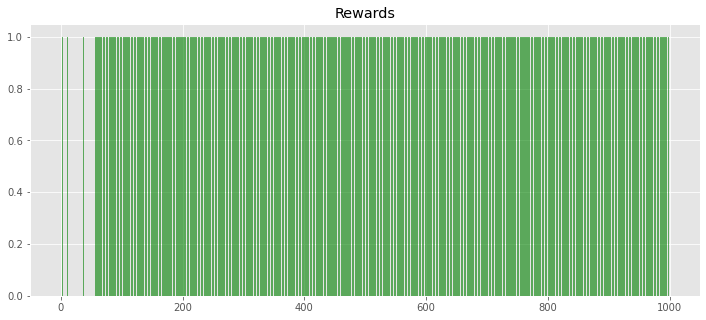

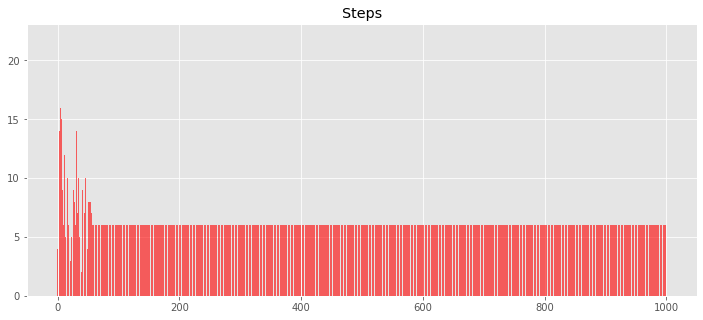

In [6]:
num_episode = 1000
steps_total = []
gamma = 0.99

total_reward = []

Q = torch.zeros([state_space, action_space])

for i_episode in range(num_episode):
    state = env.reset()
    step = 0
    
    while True:
        step += 1

        random_values = Q[state] + torch.rand(1, action_space)/1000  # add some randomness to the current Q state value 
        action = torch.max(random_values, 1)[1].item() # get the action from the max value state
        
        new_state, reward, done, info = env.step(action)

        # Update Q table using bellman equation
        Q[state][action] = reward + gamma * torch.max(Q[new_state])

        state = new_state

        #env.render()
        if done:
            steps_total.append(step)
            total_reward.append(reward)
            #print('episode finished after %i steps' %step)
            break

print(Q)
print('Percent of episodes finished successfully : {0}'.format(sum(total_reward)/num_episode))
print('Percent of episodes finished successfully (last 100 episodes) : {0}'.format(sum(total_reward[-100:])/100))
print('Average number of steps: %.2f' % (sum(steps_total)/num_episode))
print('Average number of steps (last 100 episodes): %.2f' % (sum(steps_total[-100:])/100))

plt.figure(figsize = (12, 5))
plt.title('Rewards')
plt.bar(torch.arange(len(total_reward)), total_reward, alpha = 0.6, color = 'green')
plt.show()

plt.figure(figsize = (12, 5))
plt.title('Steps')
plt.bar(torch.arange(len(steps_total)), steps_total, alpha = 0.6, color = 'red')
plt.show()